ENVIRONMENT PREPARATION

In [1]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [2]:
#Load the dataset
Spam_folder = pd.read_csv(r'C:\Users\user\Downloads\spam.csv', encoding = 'latin1')
Spam_folder

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN



DATA PREPROCESSING


In [4]:
#Check data Information
Spam_folder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Keep necessary columns
Spam_data = Spam_folder[['v1', 'v2']]

#Rename necessary columns
Spam_data.columns = ['Category', 'mail']
Spam_data

,Category,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
Spam_data.groupby('Category').describe()

mail                                                               
         count unique                                                top freq
Category                                                                     
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

DATA VISUALIZATION

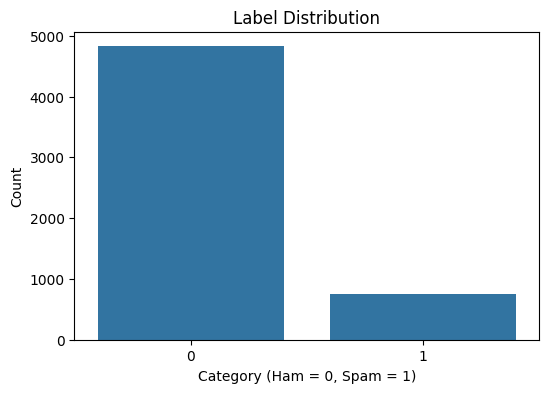

In [10]:
# Visualize distribution between the mail
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=Mail_dummy)
plt.title('Label Distribution')
plt.xlabel('Category (Ham = 0, Spam = 1)')
plt.ylabel('Count')
plt.show()

In [8]:
Spam_data.isna().sum()

Category    0
mail        0
dtype: int64

In [9]:
Spam_data.duplicated().sum()

np.int64(403)

In [11]:
Spam_data.drop_duplicates()

,Category,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


ENCODE CATEGORICAL VALUES

In [12]:
#Encode Categorical values
Mail_dummy = Spam_data.copy()
Mail_dummy['Category']= Mail_dummy['Category'].map({'ham':0, 'spam':1})
Mail_dummy

,Category,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


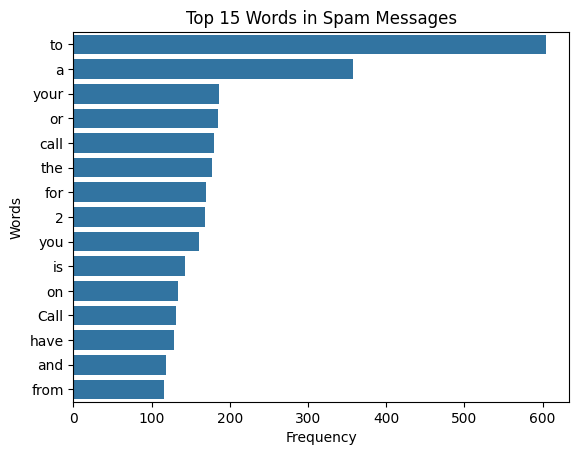

In [14]:
#Check and Plot the most frequent words in spam
spam = Mail_dummy[Mail_dummy['Category']==1]['mail']
spam_words = ''.join(spam)
spam_word_count = pd.Series(spam_words.split()).value_counts().head(15)
sns.barplot(x=spam_word_count.values, y=spam_word_count.index)
plt.title('Top 15 Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

DECLARE VARIABLES

In [15]:
#Declare inputs and targets
X= Mail_dummy['mail']
Y= Mail_dummy['Category']

SPLIT DATA

In [16]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.3, random_state=50, stratify = Y)



PIPELINE INTEGRATION



In [25]:
#This Combines vectorization and model training into a single pipeline for efficiency
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000)), #Text Vectorizer
    ('classifier', MultinomialNB()) #The model
])

pipeline.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB())])

In [26]:
#Make prediction
y_hat = model.predict(x_test_count)

#Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
print('Accuracy:', accuracy_score(y_test, y_hat))

Accuracy: 0.9832535885167464


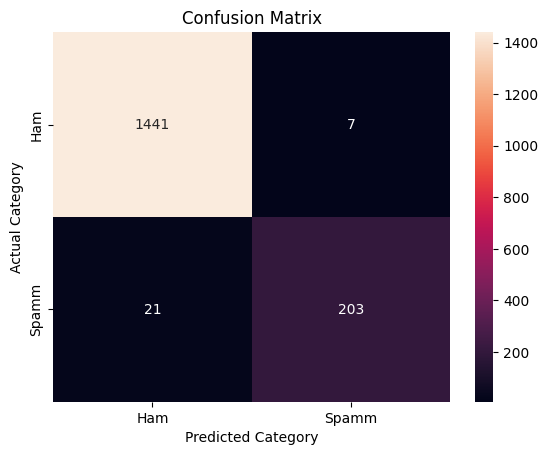

In [27]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(matrix, xticklabels = ['Ham','Spamm'], yticklabels = ['Ham','Spamm'], annot = True, fmt ='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

In [20]:
 print('Classification Report:\n', classification_report(y_test, y_hat, target_names = ['Ham','Spam']))

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1448
        Spam       0.97      0.91      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



MODEL TESTING

In [22]:
#Test with custom messages
custom_message = ["Congratulations, you've won a free ticket!", "Hello, how was school today?"]
custom_transformed = Converter.transform(custom_message)
custom_message_prediction = model.predict(custom_transformed)

In [23]:
#Predict Output
for i, message in enumerate(custom_message):
    print(f"Message: {message} -> {'Spam' if custom_message_prediction[i] == 1 else 'Ham'}")

Message: Congratulations, you've won a free ticket! -> Spam
Message: Hello, how was school today? -> Ham
